In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools


In [25]:
df = pd.read_csv("C:\\Users\\Toby\\Documents\\Digital Futures\\Projects\\WHO Project\\Life Expectancy Data.csv")
df.shape

(2864, 21)

In [27]:
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')

X = df[feature_cols]
y = df['Life_expectancy']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
1680,Tajikistan,Asia,2007,41.7,48.8,151.8545,0.54,84,90,24.8,85,86,0.10,699,7.06,3.8,3.8,10.5,0,1
2675,Burundi,Africa,2003,85.7,138.1,353.0270,6.37,87,57,20.8,75,82,1.09,298,6.91,8.5,8.5,2.1,0,1
2247,Bulgaria,European Union,2014,7.3,8.7,139.2615,10.30,95,89,26.3,88,88,0.03,6797,7.22,1.9,1.9,10.9,1,0
2088,Norway,Rest of Europe,2011,2.5,3.1,64.7610,6.44,88,94,26.4,94,94,0.04,72195,4.95,0.7,0.7,12.8,1,0
2331,Equatorial Guinea,Africa,2014,69.9,96.8,327.5505,8.64,53,64,23.9,55,20,4.04,12927,1.12,8.5,8.4,5.5,0,1


In [31]:
print(f'Same number of records in Train: {X_train.shape[0] == y_train.shape[0]}')
print(f'Same number of records in Test: {X_test.shape[0] == y_test.shape[0]}')

Same number of records in Train: True
Same number of records in Test: True


In [33]:
assert(all(X_train.index == y_train.index)), "There is some index mismatch in Train"
assert(all(X_test.index == y_test.index)), "There is some index mismatch in Test"

**List of Regions:**

* Africa
* Asia
* Central America and the Caribbean
* European Union
* Middle East
* North America
* Oceania
* Rest of Europe
* South America

In [35]:
# X_train = X_train.drop(columns=['Country']).copy()
# X_test = X_test.drop(columns=['Country']).copy()
# X_train = pd.get_dummies(X_train, columns=['Region'], drop_first=True, prefix = 'region', dtype = int)
# X_test = pd.get_dummies(X_test, columns=['Region'], drop_first=True, prefix = 'region', dtype = int)

# X_train.head()

In [40]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

**Columns to change data types:**

* Country - Is this necessary for modelling?
* Region - OHE?

In [45]:
X_train.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,2007.395897,30.254998,42.725578,192.346747,4.844230,84.317765,77.312091,25.047665,86.480140,86.323003,0.912156,11439.604103,36.068926,4.816499,4.881798,7.646923,0.206460,0.793540
std,4.630821,27.490335,44.336030,115.293803,3.974687,15.847316,18.724431,2.164319,15.140418,15.445396,2.413987,16746.191140,137.074014,4.372490,4.489750,3.150696,0.404853,0.404853
min,2000.000000,1.800000,2.300000,49.384000,0.000000,14.000000,10.000000,19.800000,8.000000,16.000000,0.010000,163.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000
25%,2003.000000,8.100000,9.600000,107.193750,1.245000,78.000000,64.000000,23.300000,81.000000,81.000000,0.080000,1445.000000,2.185000,1.600000,1.600000,5.100000,0.000000,1.000000
50%,2007.000000,19.500000,23.000000,163.812500,4.120000,89.000000,83.000000,25.600000,93.000000,93.000000,0.150000,4208.000000,7.840000,3.300000,3.300000,7.800000,0.000000,1.000000
75%,2011.000000,47.650000,65.850000,246.572500,7.715000,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12374.000000,23.505000,7.200000,7.250000,10.300000,0.000000,1.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,110095.000000,1371.860000,27.700000,28.600000,14.100000,1.000000,1.000000


**Notes:**

* Data runs from 2000 to 2015
* Economy Status is a binary pair - Must be one or the other? - **check**
* Diseases - rounded numbers? Or is this a rounding issue?
* Not for this stage but scaling needed
    * *GDP* - Large values on a different scale 
    * *Population* - Outliers for large countries
    * *Thinness* - Data Distribution
* Potential multicollinearity errors:
    * *GDP and Population* --> Population size of the country tends to directly impact GDP - more workers and production etc.
    * *Infant and Under 5 Deaths* --> Represent a death twice?
    * *Thinness for both age ranges* --> Best to find the average?

In [ ]:
df[df['Economy_status_Developed'] != df['Economy_status_Developing']].count()

C:\Users\Toby\AppData\Local\Temp\ipykernel_26496\148721706.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


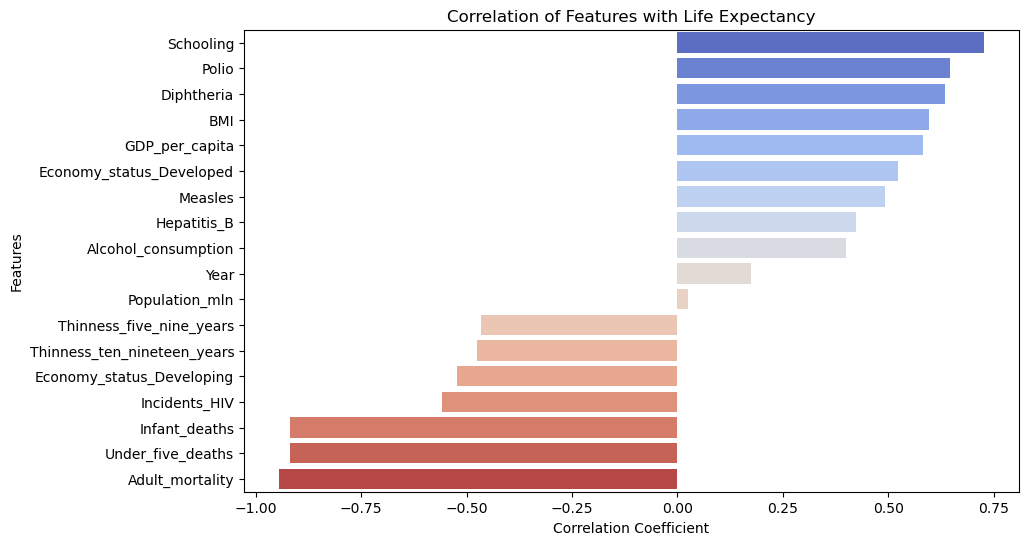

In [89]:
X_train['Life_expectancy'] = y_train


correlation_with_target = X_train.corr(numeric_only = True)['Life_expectancy'].drop('Life_expectancy').sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation of Features with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

X_train = X_train.drop(columns=['Life_expectancy'])

In [95]:
X_train.corr(numeric_only = True)

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
Year,1.000000,-0.174802,-0.176216,-0.158960,-0.000215,0.187111,0.080210,0.163734,0.150018,0.151558,-0.079421,0.031222,0.012098,-0.041713,-0.039599,0.138087,-0.006116,0.006116
Infant_deaths,-0.174802,1.000000,0.986291,0.787931,-0.457108,-0.519484,-0.525223,-0.661561,-0.748511,-0.731096,0.347838,-0.512437,0.005849,0.493164,0.484237,-0.784867,-0.473837,0.473837
Under_five_deaths,-0.176216,0.986291,1.000000,0.797639,-0.413032,-0.517620,-0.513561,-0.666369,-0.750867,-0.734386,0.368439,-0.470694,-0.006053,0.471881,0.458979,-0.769966,-0.426355,0.426355
Adult_mortality,-0.158960,0.787931,0.797639,1.000000,-0.245017,-0.351081,-0.420876,-0.517565,-0.527776,-0.519343,0.705844,-0.507514,-0.054772,0.390146,0.386727,-0.572070,-0.428573,0.428573
Alcohol_consumption,-0.000215,-0.457108,-0.413032,-0.245017,1.000000,0.168187,0.317785,0.282464,0.299592,0.302671,-0.034691,0.451122,-0.040331,-0.444895,-0.437012,0.616514,0.668382,-0.668382
Hepatitis_B,0.187111,-0.519484,-0.517620,-0.351081,0.168187,1.000000,0.417096,0.355688,0.724899,0.757814,-0.077838,0.156842,-0.084541,-0.209786,-0.220264,0.350003,0.108472,-0.108472
Measles,0.080210,-0.525223,-0.513561,-0.420876,0.317785,0.417096,1.000000,0.405620,0.507284,0.489894,-0.162401,0.308100,-0.086725,-0.340363,-0.367436,0.502060,0.291502,-0.291502
BMI,0.163734,-0.661561,-0.666369,-0.517565,0.282464,0.355688,0.405620,1.000000,0.469874,0.439675,-0.164780,0.325141,-0.163917,-0.601765,-0.612246,0.629749,0.244524,-0.244524
Polio,0.150018,-0.748511,-0.750867,-0.527776,0.299592,0.724899,0.507284,0.469874,1.000000,0.955601,-0.150882,0.313190,-0.031600,-0.321409,-0.317401,0.554012,0.280397,-0.280397
Diphtheria,0.151558,-0.731096,-0.734386,-0.519343,0.302671,0.757814,0.489894,0.439675,0.955601,1.000000,-0.150576,0.313494,-0.025863,-0.315567,-0.308209,0.541265,0.287732,-0.287732
